In [48]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
    
data = load_wine()
X=data.data
y=data.target
print(data.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


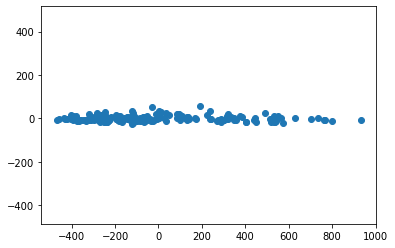

the pca correlation  -3.608224830031759e-16


In [41]:
model=PCA()
model.fit(X)
pca_features=model.transform(X)
#print(pca_features)
#transformed returns an array with the same number of rows and columns as the original sample

xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()


correlation, pvalue = pearsonr(xs,ys)

print("the pca correlation ",correlation)



In [19]:
print(model.components_)

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]
 [-1.68738094e-02 -1.22003373e-01 -5.19874304e-02 -9.38593003e-01
   2.97802484e-02  4.04846439e-02  8.54433387e-02 -1.35107797e-02
   2.46593824e-02 -2.91398464e-01  2.59776624e-02  7.03239693e-02
  -4.52868159e-03]
 [-1.41446778e-01 -1.60389543e-01  9.77280992e-03  3.30965260e-01
   5.39375605e-03  7.45846556e-02  1.69086724e-01 -1.08055610e-02
   5.01209524e-02 -8.78893693e-01  6.00349446e-02  1.78200254e-01
   3.11291570e-03]
 [ 2.03369773e-02 -6.12883454e-01  2.01755752e-02  6.43523403e-02
  -6.14934472e-03  3.15245063e-01  5.24761088e-01 -2.96475124e-02


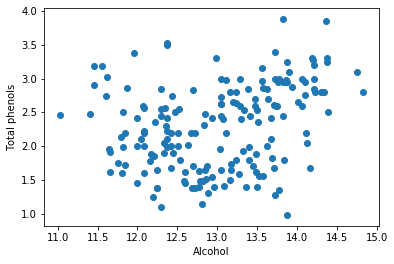

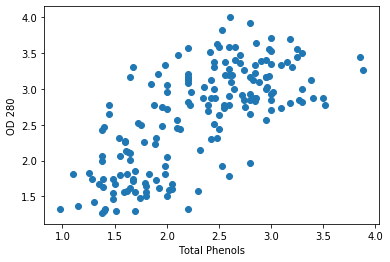

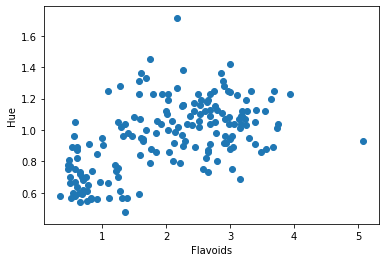

total phenols and od280 correlation is  0.6999493647911862
total alcohol and total phenols correlation is  0.28910112258745674
flavoid and hue correlation is  0.5434785664899897


In [36]:
alcohol=X[:,0]
total_phenols=X[:,5]
od_280=X[:,11]
hue=X[:,10]
flavoids=X[:,6]
_=plt.scatter(x=alcohol,y=total_phenols)
_=plt.xlabel('Alcohol')
_=plt.ylabel('Total phenols')
plt.show()

_=plt.scatter(x=total_phenols,y=od_280)
_=plt.xlabel('Total Phenols')
_=plt.ylabel('OD 280')
plt.show()

_=plt.scatter(x=flavoids, y=hue)
_=plt.xlabel('Flavoids')
_=plt.ylabel('Hue')
plt.show()

correlation, pvalue = pearsonr(total_phenols,od_280)

# Display the correlation
print("total phenols and od280 correlation is ",correlation)

correlation, pvalue = pearsonr(alcohol,total_phenols)

print("total alcohol and total phenols correlation is ",correlation)

correlation, pvalue = pearsonr(flavoids,hue)

print("flavoid and hue correlation is ",correlation)
#https://psuwineandgrapes.wordpress.com/2015/03/06/what-contributes-to-red-wine-color-a-primer-on-pigmentation-in-red-wine/

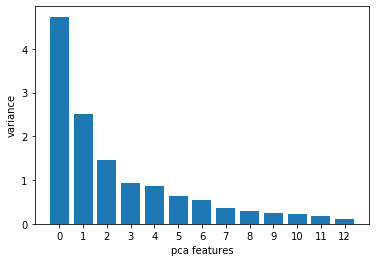

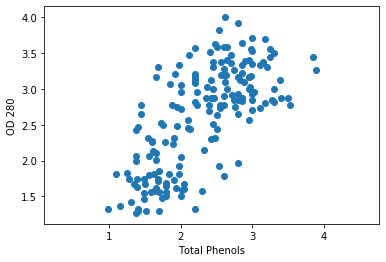

In [53]:

pca=PCA()
pca.fit(X)

scaler = StandardScaler()

pipeline= make_pipeline(scaler, pca)

pipeline.fit(X)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('pca features')
plt.ylabel('variance')

plt.show()

mean=model.mean_
features = range(pca.n_components_)
first_pc = pca.components_[0,:]

_=plt.scatter(x=total_phenols,y=od_280)
_=plt.xlabel('Total Phenols')
_=plt.ylabel('OD 280')
_=plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal')

plt.show()